<h4>Data Set</h4>
<a href="https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data">NIFTY-50 Stock Market Data (2000 - 2021)</a>
<h5>About Dataset</h5>
<p>The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 30th April, 2021.</p>
Note: The dataset contains stock data for 50 stocks

<h5>Columns</h5>

Date - Trade Data

Symbol - Name of stock

Series - Type of security

Prev Close - Previous data closing price

Open - Opening price for the day

High - Highest price for the day

Low - Lowest price for the day

Last - Last trade price

Closes - Closing price

VWAP - Volume-weighted average price (a ratio of the cumulative share price to the cumulative volume traded over a given time period)

Volume - volume trades for the day

Turnover - The turnover ratio is ratio of sellers to buyers of a stock

Trades - Number of Trades

Deliverable Volume - Amount of deliverable volume

%Deliverble - Percentage of shares that were delivered

In [490]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [491]:
df = pd.read_csv('ADANIPORTS.csv')

In [492]:
df.head() 

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


Data Preprocessing

In [493]:
df.shape

(3322, 15)

In [494]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [496]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [497]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [498]:
#checking is there any different category of stock available
df["Symbol"].unique()

array(['MUNDRAPORT', 'ADANIPORTS'], dtype=object)

In [499]:
#it is converted to catergory because it is categorical data
#in short it holds the single catergroy stock
df = df.astype({'Symbol': 'category'})

In [500]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [501]:
# convert column date to type date
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                  datetime64[ns]
Symbol                      category
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume             int64
%Deliverble                  float64
dtype: object

In [502]:
# year day month new columns in dataframe
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612,2007,11,27
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172,2007,11,28
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088,2007,11,29
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735,2007,11,30
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741,2007,12,3


There are NaN values present in the data, the dataset captured 0 as Null/NaN hence filling the null values with 0 for Trades, Deliverable Volume and %Deliverble.

Explained below:

<b>Number of Trades</b> can be 0 - It's very simple to understand that if the deal which is comprised of sellers and buyers is zero, the buyers and sellers for that trade aren't buying or selling.
Volumes are always positive if not zero and can be represented as the number of trades per day for a commodity, stock, options, or future.


In [503]:
# replace null values with 0 based on the above explanation
df["Trades"].fillna(0, inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20272\658859132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Trades"].fillna(0, inplace = True)


In [504]:
df['Daily Range'] = df['High'] - df['Low']

In [505]:
df['Price_Change'] = df['Close'].pct_change()  # Percentage change in stock price
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,Daily Range,Price_Change
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,0.0,9859619,0.3612,2007,11,27,280.00,NaN
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,0.0,1453278,0.3172,2007,11,28,116.00,-0.071659
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,0.0,1069678,0.2088,2007,11,29,73.75,-0.010851
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,0.0,1260913,0.2735,2007,11,30,68.00,0.042242
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,0.0,816123,0.2741,2007,12,3,73.00,0.051815


In [506]:
# checking if there is still any null values
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Year                  0
Month                 0
Day                   0
Daily Range           0
Price_Change          1
dtype: int64

In [507]:
df['Price_Change'].fillna(np.mean(df['Price_Change']), inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20272\3562652095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price_Change'].fillna(np.mean(df['Price_Change']), inplace = True)


In [508]:
df['Price_Change'].head()

0    0.000526
1   -0.071659
2   -0.010851
3    0.042242
4    0.051815
Name: Price_Change, dtype: float64

In [509]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Year                  0
Month                 0
Day                   0
Daily Range           0
Price_Change          0
dtype: int64

Data Visualization

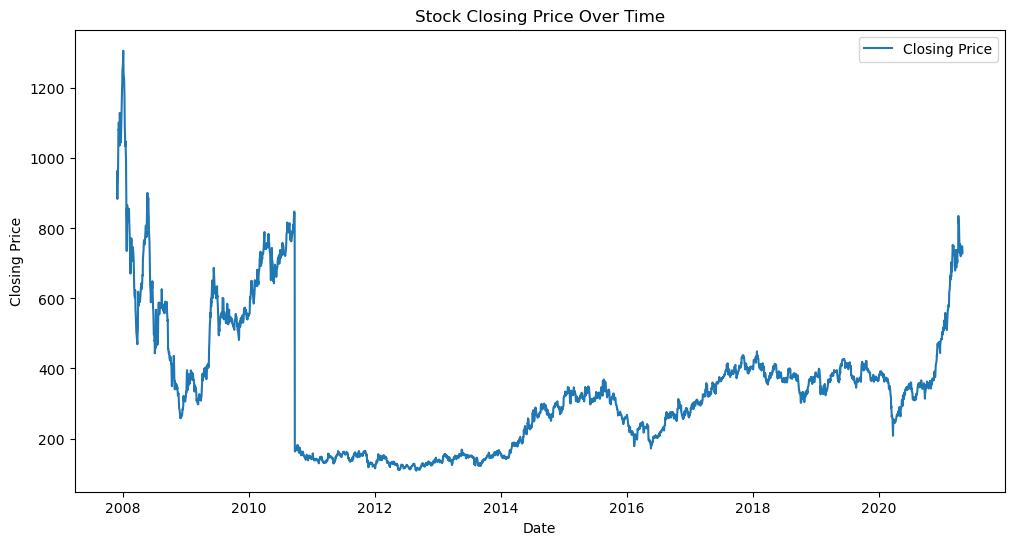

In [510]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

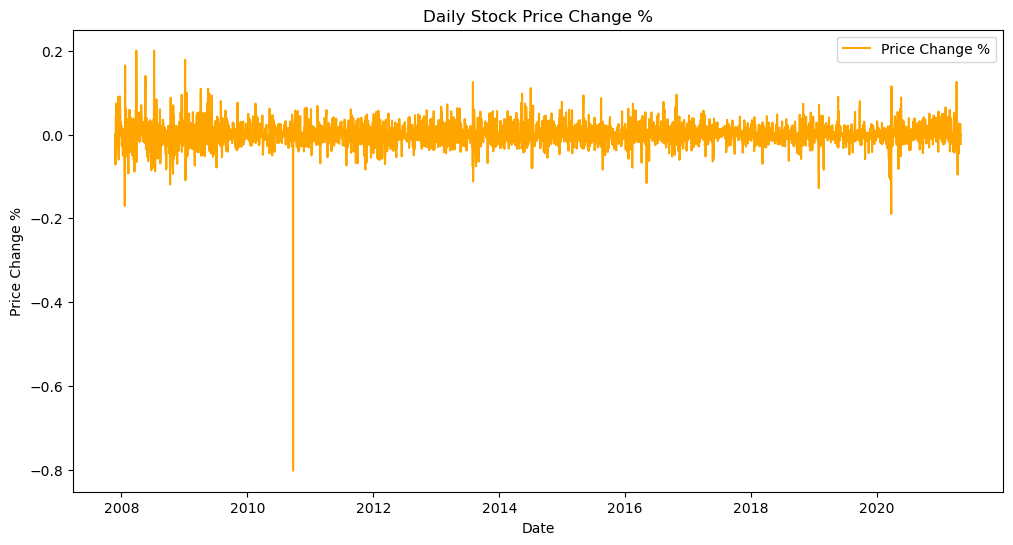

In [511]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price_Change'], label='Price Change %', color='orange')
plt.title('Daily Stock Price Change %')
plt.xlabel('Date')
plt.ylabel('Price Change %')
plt.legend()
plt.show()

d:\New folder\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


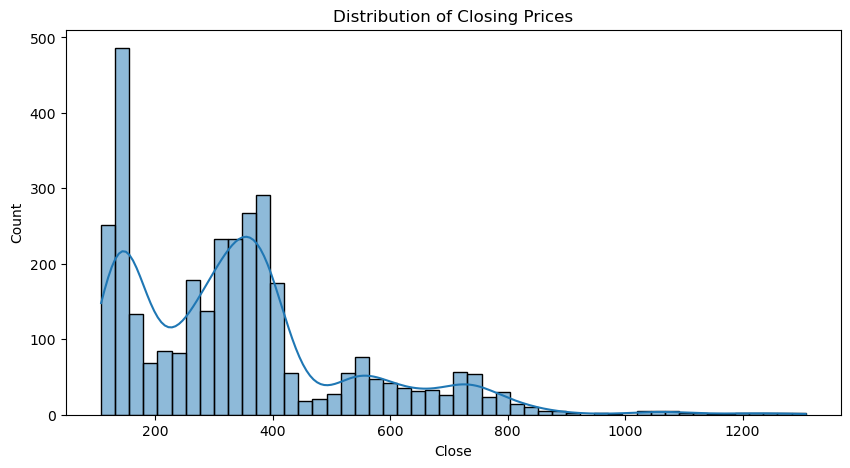

In [512]:
# Distribution of closing prices
plt.figure(figsize=(10,5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()


<h4>Feature Selection Methods</h4> 
using Correlation Coefficient

In [513]:
# Selecting individual Stocks to carry forward the analysis
data_ap = df.loc[ df["Symbol"] == "ADANIPORTS"]

# Dropping Columns since they are not important
data_ap = data_ap.drop(labels=["Series","Symbol"], axis=1)

<Axes: >

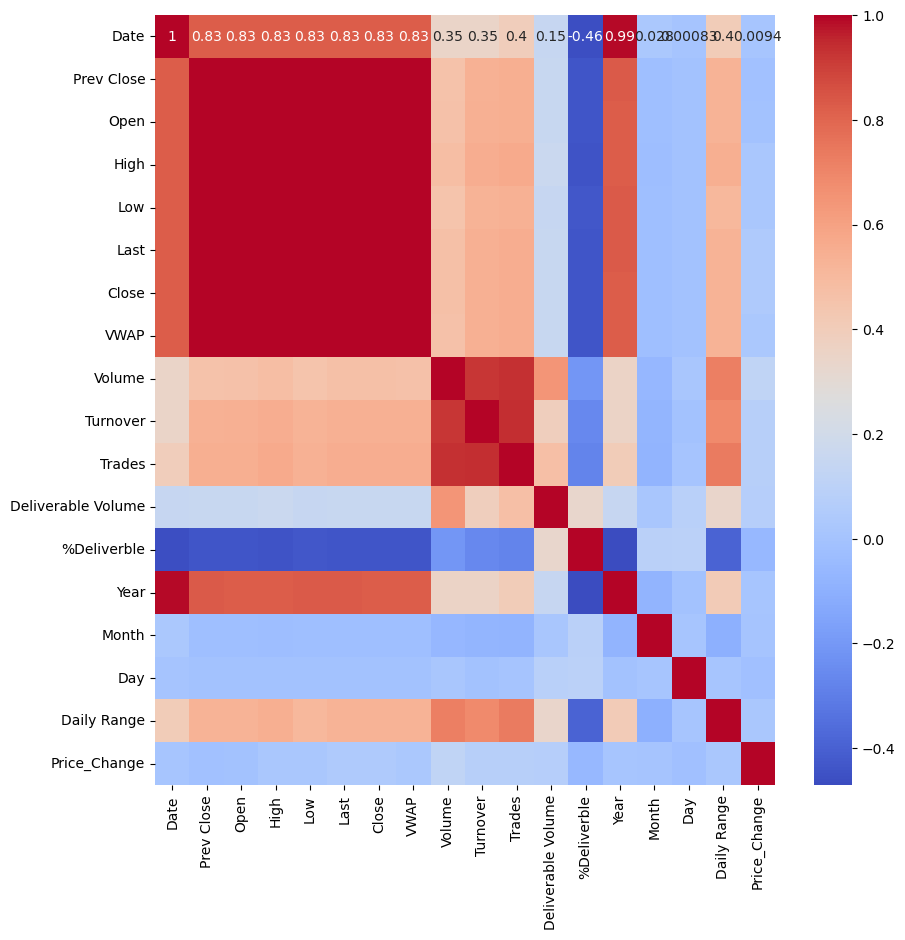

In [514]:
# correlation matrix for Asianpaints
corr = data_ap.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [515]:
X = df[[ 'High', 'Low', 'Year', 'Month', 'Day']]  # Features
y = df['Close']

In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [517]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [518]:
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

In [519]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Accuracy based on R^2 (higher R^2 means better accuracy)
print(f'Model Accuracy (R^2 Score): {r2 * 100:.2f}%')


Mean Squared Error (MSE): 44.443462080939845
Root Mean Squared Error (RMSE): 6.666592988996692
R^2 Score: 0.9987650779072894
Model Accuracy (R^2 Score): 99.88%


In [520]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')
print(f'Random Forest - Model Accuracy (R^2 Score): {r2_rf * 100:.2f}%')


Random Forest - Mean Squared Error (MSE): 55.671073797368905
Random Forest - Root Mean Squared Error (RMSE): 7.46130510013958
Random Forest - R^2 Score: 0.9984531034321295
Random Forest - Model Accuracy (R^2 Score): 99.85%


In [521]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf')  # You can tune kernel, C, and gamma
svr_model.fit(X_train_scaled, y_train)

# Predict the target values
y_pred_svr = svr_model.predict(X_test_scaled)

# Define a simple accuracy metric (percentage of predictions within a threshold)
threshold = 0.5  # Example threshold of 10% relative error
accuracy = np.mean(np.abs((y_test - y_pred_svr) / y_test) < threshold) * 100

# Print the simple accuracy
print(f'SVR - Simple Accuracy (within {threshold * 100}% error): {accuracy:.2f}%')

# You can also print MSE and RMSE for reference
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print(f'SVR - Mean Squared Error (MSE): {mse_svr}')
print(f'SVR - Root Mean Squared Error (RMSE): {rmse_svr}')


SVR - Simple Accuracy (within 50.0% error): 95.49%
SVR - Mean Squared Error (MSE): 9887.558684076786
SVR - Root Mean Squared Error (RMSE): 99.43620409125032


In [522]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train_scaled, y_train)

# Predict the target values
y_pred_knn = knn_model.predict(X_test_scaled)

# Define a simple accuracy metric (percentage of predictions within a threshold)
threshold = 0.1  # Example threshold of 10% relative error
accuracy = np.mean(np.abs((y_test - y_pred_knn) / y_test) < threshold) * 100

# Print the simple accuracy
print(f'KNN - Simple Accuracy (within {threshold * 100}% error): {accuracy:.2f}%')



KNN - Simple Accuracy (within 10.0% error): 93.23%


In [523]:
# Check the highest values
highest_open = df['Open'].max()
highest_high = df['High'].max()
highest_low = df['Low'].max()

# Check the lowest values
lowest_open = df['Open'].min()
lowest_high = df['High'].min()
lowest_low = df['Low'].min()

In [524]:
future_data = pd.DataFrame([[ highest_high, lowest_low, 2021, 5, 15]], columns=['High', 'Low', 'Year', 'Month', 'Day'])


In [525]:
future_data_scaled = scaler.transform(future_data)


In [526]:
future_pred = linear_model.predict(future_data_scaled)
print(f'Predicted Stock Price for 2021-05-15: {future_pred[0]}')

Predicted Stock Price for 2021-05-15: 792.0828301178417


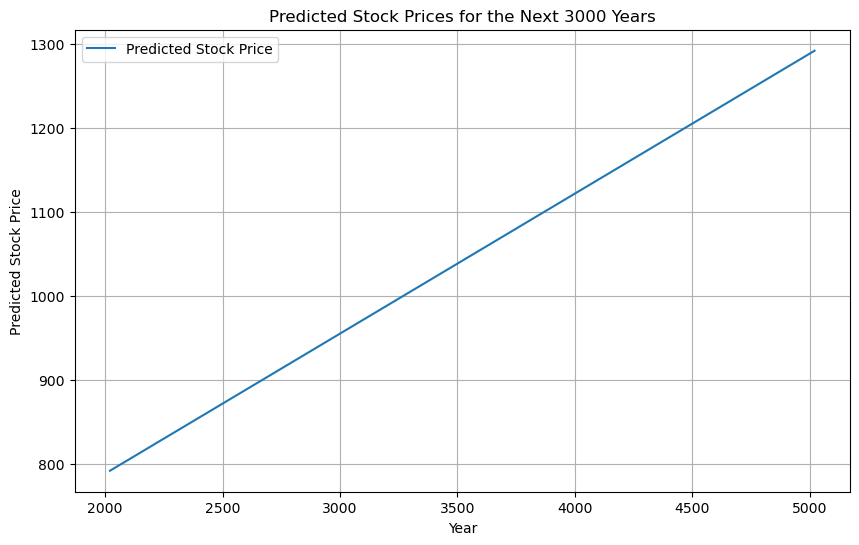

In [527]:


future_years = np.arange(2021, 2021 + 3000)  # from 2021 to 5021

# We'll assume the same month, day, and volume for simplicity 

future_month = 5
future_day = 15
future_volume = 2000000  # Estimated constant volume
future_data = pd.DataFrame({  # Use 'Open' instead of 'Lowest Open'
    'High': [highest_high] * len(future_years),  # Use 'High' instead of 'Highest High'
    'Low': [lowest_low] * len(future_years),  # Use 'Low' instead of 'Lowest Low'
    'Year': future_years,
    'Month': [future_month] * len(future_years),
    'Day': [future_day] * len(future_years)
})

# Scale the future data
future_data_scaled = scaler.transform(future_data)  # Ensure 'scaler' is already fitted on the correct features

# Predict future stock prices
future_pred = linear_model.predict(future_data_scaled)  # Ensure 'linear_model' is fitted

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_years, future_pred, label='Predicted Stock Price')
plt.title('Predicted Stock Prices for the Next 3000 Years')
plt.xlabel('Year')
plt.ylabel('Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [528]:
# Display predicted stock prices for each year
for year, pred in zip(future_years, future_pred):
    print(f'Year: {year}, Predicted Stock Price: {pred:.2f}')



Year: 2021, Predicted Stock Price: 792.08
Year: 2022, Predicted Stock Price: 792.25
Year: 2023, Predicted Stock Price: 792.42
Year: 2024, Predicted Stock Price: 792.58
Year: 2025, Predicted Stock Price: 792.75
Year: 2026, Predicted Stock Price: 792.92
Year: 2027, Predicted Stock Price: 793.08
Year: 2028, Predicted Stock Price: 793.25
Year: 2029, Predicted Stock Price: 793.42
Year: 2030, Predicted Stock Price: 793.58
Year: 2031, Predicted Stock Price: 793.75
Year: 2032, Predicted Stock Price: 793.92
Year: 2033, Predicted Stock Price: 794.08
Year: 2034, Predicted Stock Price: 794.25
Year: 2035, Predicted Stock Price: 794.42
Year: 2036, Predicted Stock Price: 794.58
Year: 2037, Predicted Stock Price: 794.75
Year: 2038, Predicted Stock Price: 794.92
Year: 2039, Predicted Stock Price: 795.08
Year: 2040, Predicted Stock Price: 795.25
Year: 2041, Predicted Stock Price: 795.42
Year: 2042, Predicted Stock Price: 795.58
Year: 2043, Predicted Stock Price: 795.75
Year: 2044, Predicted Stock Price: